## chi2検定

In [1]:
import numpy as np
## 1
observed_freq = np.array([330, 99, 107, 20])
probability = np.array([9, 3, 3, 1])/16
theorem_freq = sum(observed_freq) * probability

chi_2 = ((observed_freq - theorem_freq)**2 / theorem_freq).sum()
print('χ2 = '+str(chi_2))

from scipy.stats import chi2
a = chi2.isf(0.1, 3)
print('棄却域  > '+ str(a))

if chi_2 < a:
    print('棄却されない')
else:
    print('棄却')

χ2 = 7.54916067146283
棄却域  > 6.2513886311703235
棄却


## chi2分布
サンプル数＝Nを大きくしたとき，chi2値の分布はchi2分布に従うことを確認

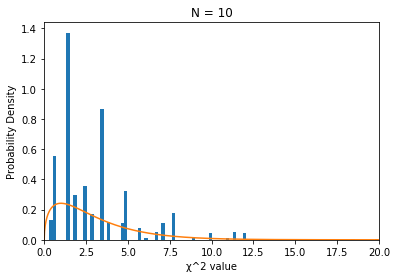

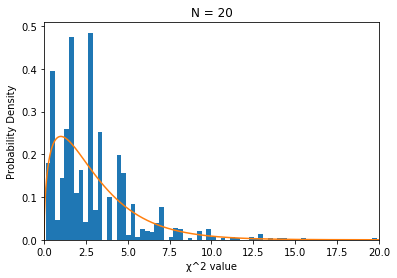

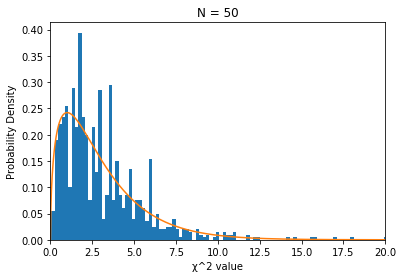

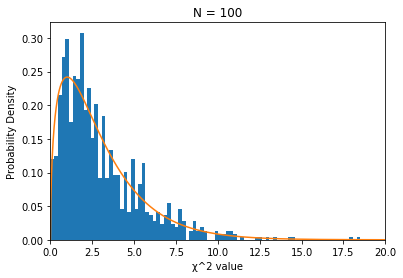

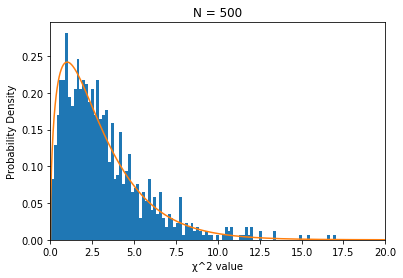

In [4]:
from numpy.random import choice
import matplotlib.pyplot as plt
Ns = [10,20,50,100,500]
iteration = 1000
for N in Ns:
    pde = np.array([choice(range(4), N, p=probability) for i in range(iteration)])
    observed_freq = np.array([np.count_nonzero(pde == i, axis=1) for i in range(4)]).T
    theorem_freq = N * probability
    chi_2 = ((observed_freq - theorem_freq)**2 / theorem_freq).sum(axis=1)
    plt.figure()
    plt.xlim(0,20)
    plt.xlabel('χ^2 value')
    plt.ylabel('Probability Density')
    plt.title('N = ' + str(N))
    plt.hist(chi_2, bins=100, density=True)
    x = np.linspace(0, 20, 1000)
    plt.plot(x, chi2.pdf(x, 3))

## 独立性の検定

In [5]:

observed = np.array([[9500, 90500],[9800, 90200]])
p = observed.sum(axis=0)/observed.sum()
q = observed.sum(axis=1)/observed.sum()
theorem_freq = (observed.sum() * np.outer(p,q)).T

chi_2 = ((observed - theorem_freq)**2 / theorem_freq).sum()
print(chi_2)

a = chi2.isf(0.05, 1)
print(a)
if chi_2 < a:
    print('棄却されない')
else:
    print('棄却')

5.1612755232243055
3.8414588206941285
棄却
